In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from networks import NoKafnet, Kafnet
import utils.datasetsUtils.CIFAR as CIFAR
from utils.datasetsUtils.taskManager import SingleTargetClassificationTask, NoTask
from configs.configs import DefaultConfig, CONFIG_CIFAR10
from torchvision.transforms import transforms
import torch
from Trainer import Trainer
import matplotlib.pyplot as plt
from collections import defaultdict
import copy
import numpy as np

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
1
GeForce GTX 1050


In [4]:
config = CONFIG_CIFAR10()
config.EPOCHS = 1
print(config)

confing_no_ewt = copy.copy(config)
confing_no_ewt.USE_EWC = False
print(confing_no_ewt)

CONFIG PARAMETERS
BATCH_SIZE: 64
DEVICE: cuda
EPOCHS: 1
EWC_IMPORTANCE: 1000
EWC_SAMPLE_SIZE: 250
IS_CONVOLUTIONAL: True
ITERS: 1
L1_REG: 0
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
OPTIMIZER: SGD
RUN_NAME: default
USE_EWC: True
USE_TENSORBOARD: True

CONFIG PARAMETERS
BATCH_SIZE: 64
DEVICE: cuda
EPOCHS: 1
EWC_IMPORTANCE: 1000
EWC_SAMPLE_SIZE: 250
IS_CONVOLUTIONAL: True
ITERS: 1
L1_REG: 0
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
OPTIMIZER: SGD
RUN_NAME: default
USE_EWC: False
USE_TENSORBOARD: True



In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]
)

dataset = CIFAR.Cifar10('../data/cifar10', SingleTargetClassificationTask(), download=True,
                        force_download=False, train_split=0.8, transform=transform, target_transform=None)
dataset.load_dataset()

dataset_no_ewt = copy.deepcopy(dataset)
dataset_kaf = copy.deepcopy(dataset)
dataset_kaf_no_ewt = copy.deepcopy(dataset)

task #0 with train 48000 and test 12000 images (label: airplane)
task #1 with train 48000 and test 12000 images (label: automobile)
task #2 with train 48000 and test 12000 images (label: bird)
task #3 with train 48000 and test 12000 images (label: cat)
task #4 with train 48000 and test 12000 images (label: deer)
task #5 with train 48000 and test 12000 images (label: dog)
task #6 with train 48000 and test 12000 images (label: frog)
task #7 with train 48000 and test 12000 images (label: horse)
task #8 with train 48000 and test 12000 images (label: ship)
task #9 with train 48000 and test 12000 images (label: truck)


In [6]:
net_ewt = NoKafnet.CNN(dataset.tasks_number)
net_no_ewt = NoKafnet.CNN(dataset.tasks_number)
print('Numero di parametri rete classica: ', sum([torch.numel(p) for p in net_ewt.parameters()])) 

Numero di parametri rete classica:  171732


In [7]:
trainer_ewt = Trainer(net_ewt, dataset, config)
trainer_no_ewt = Trainer(net_no_ewt, dataset_no_ewt, confing_no_ewt)

In [8]:
results_ewt, losses_ewt = trainer_ewt.all_tasks()

Training task 0, epoch 1: 100%|██████████| 750/750 [00:18<00:00, 40.90it/s, loss=0.277, batch#=750]
Testing task 0: 188it [00:02, 64.98it/s, batch#=188]                         
Testing task 1: 188it [00:02, 61.24it/s, batch#=188]                         
Testing task 2: 188it [00:02, 62.87it/s, batch#=188]                         
Testing task 3: 188it [00:03, 62.56it/s, batch#=188]                         
Testing task 4: 188it [00:02, 63.84it/s, batch#=188]                         
Testing task 5: 188it [00:02, 64.06it/s, batch#=188]                         
Testing task 6: 188it [00:02, 63.81it/s, batch#=188]                         
Testing task 7: 188it [00:02, 63.31it/s, batch#=188]                         
Testing task 8: 188it [00:02, 63.80it/s, batch#=188]                         
Testing task 9: 188it [00:02, 63.64it/s, batch#=188]                         
Training task 1, epoch 1: 100%|██████████| 750/750 [00:22<00:00, 33.14it/s, loss=0.504, batch#=750]
Testing task 1: 188i

Training task 9, epoch 1: 100%|██████████| 750/750 [00:22<00:00, 33.24it/s, loss=0.513, batch#=750]
Testing task 9: 188it [00:02, 64.39it/s, batch#=188]                         
Testing task 0: 188it [00:02, 61.90it/s, batch#=188]                         
Testing task 1: 188it [00:03, 63.22it/s, batch#=188]                         
Testing task 2: 188it [00:02, 63.11it/s, batch#=188]                         
Testing task 3: 188it [00:03, 62.49it/s, batch#=188]                         
Testing task 4: 188it [00:02, 63.85it/s, batch#=188]                         
Testing task 5: 188it [00:02, 63.82it/s, batch#=188]                         
Testing task 6: 188it [00:02, 62.83it/s, batch#=188]                         
Testing task 7: 188it [00:02, 63.04it/s, batch#=188]                         
Testing task 8: 188it [00:02, 63.11it/s, batch#=188]                         
/media/jary/DATA/Uni/tesi/codice/utils/datasetsUtils/dataset.py:53: UserWarning: No more tasks...
  warnings.warn("No mo

In [ ]:
results_no_ewt, losses_no_ewt = trainer_no_ewt.all_tasks()



  0%|          | 0/750 [00:00<?, ?it/s]

Training task 1, epoch 1:   1%|          | 4/750 [00:00<00:21, 34.33it/s, loss=0.272, batch#=4]

Training task 1, epoch 1:   1%|          | 8/750 [00:00<00:20, 35.78it/s, loss=0.261, batch#=8]

Training task 1, epoch 1:   2%|▏         | 12/750 [00:00<00:20, 36.45it/s, loss=0.238, batch#=12]

Training task 1, epoch 1:   2%|▏         | 16/750 [00:00<00:19, 36.85it/s, loss=0.242, batch#=16]

Training task 1, epoch 1:   3%|▎         | 20/750 [00:00<00:20, 35.34it/s, loss=0.245, batch#=20]

Training task 1, epoch 1:   3%|▎         | 24/750 [00:00<00:20, 35.86it/s, loss=0.252, batch#=24]

Training task 1, epoch 1:   4%|▎         | 28/750 [00:00<00:19, 36.69it/s, loss=0.253, batch#=28]

Training task 1, epoch 1:   4%|▍         | 32/750 [00:00<00:19, 37.01it/s, loss=0.257, batch#=32]

Training task 1, epoch 1:   5%|▍         | 36/750 [00:00<00:19, 36.47it/s, loss=0.254, batch#=36]

Training task 1, epoch 1:   5%|▌         | 40/750 [00:01<00:19, 37.11i

Training task 1, epoch 1:  42%|████▏     | 314/750 [00:08<00:13, 33.53it/s, loss=0.247, batch#=314]

Training task 1, epoch 1:  42%|████▏     | 318/750 [00:08<00:12, 33.84it/s, loss=0.247, batch#=318]

Training task 1, epoch 1:  43%|████▎     | 322/750 [00:09<00:12, 33.49it/s, loss=0.247, batch#=322]

Training task 1, epoch 1:  43%|████▎     | 326/750 [00:09<00:12, 33.14it/s, loss=0.247, batch#=326]

Training task 1, epoch 1:  44%|████▍     | 330/750 [00:09<00:12, 33.34it/s, loss=0.248, batch#=330]

Training task 1, epoch 1:  45%|████▍     | 334/750 [00:09<00:12, 34.28it/s, loss=0.247, batch#=334]

Training task 1, epoch 1:  45%|████▌     | 338/750 [00:09<00:12, 34.15it/s, loss=0.247, batch#=338]

Training task 1, epoch 1:  46%|████▌     | 342/750 [00:09<00:11, 34.81it/s, loss=0.247, batch#=342]

Training task 1, epoch 1:  46%|████▌     | 346/750 [00:09<00:11, 35.94it/s, loss=0.247, batch#=346]

Training task 1, epoch 1:  47%|████▋     | 350/750 [00:09<00:11, 35.32it/s, loss=0.247, bat

Training task 1, epoch 1:  82%|████████▏ | 618/750 [00:17<00:04, 32.23it/s, loss=0.237, batch#=618]

Training task 1, epoch 1:  83%|████████▎ | 622/750 [00:17<00:04, 31.94it/s, loss=0.237, batch#=622]

Training task 1, epoch 1:  83%|████████▎ | 626/750 [00:17<00:03, 32.30it/s, loss=0.237, batch#=626]

Training task 1, epoch 1:  84%|████████▍ | 630/750 [00:17<00:03, 32.72it/s, loss=0.236, batch#=630]

Training task 1, epoch 1:  85%|████████▍ | 634/750 [00:18<00:03, 31.84it/s, loss=0.236, batch#=634]

Training task 1, epoch 1:  85%|████████▌ | 638/750 [00:18<00:03, 32.32it/s, loss=0.236, batch#=638]

Training task 1, epoch 1:  86%|████████▌ | 642/750 [00:18<00:03, 32.86it/s, loss=0.236, batch#=642]

Training task 1, epoch 1:  86%|████████▌ | 646/750 [00:18<00:03, 33.30it/s, loss=0.236, batch#=646]

Training task 1, epoch 1:  87%|████████▋ | 650/750 [00:18<00:03, 32.52it/s, loss=0.236, batch#=650]

Training task 1, epoch 1:  87%|████████▋ | 654/750 [00:18<00:02, 32.75it/s, loss=0.236, bat

Testing task 0:  74%|███████▍  | 139/187 [00:02<00:00, 52.52it/s, batch#=139]

Testing task 0:  78%|███████▊  | 145/187 [00:02<00:00, 52.45it/s, batch#=145]

Testing task 0:  81%|████████  | 151/187 [00:02<00:00, 53.30it/s, batch#=151]

Testing task 0:  84%|████████▍ | 157/187 [00:02<00:00, 53.31it/s, batch#=157]

Testing task 0:  87%|████████▋ | 163/187 [00:02<00:00, 53.80it/s, batch#=163]

Testing task 0:  90%|█████████ | 169/187 [00:02<00:00, 54.42it/s, batch#=169]

Testing task 0:  94%|█████████▎| 175/187 [00:03<00:00, 53.73it/s, batch#=175]

Testing task 0:  97%|█████████▋| 181/187 [00:03<00:00, 54.06it/s, batch#=181]

Testing task 0: 100%|██████████| 187/187 [00:03<00:00, 54.27it/s, batch#=187]

Testing task 0: 188it [00:03, 57.09it/s, batch#=188]                         

  0%|          | 0/187 [00:00<?, ?it/s]

Testing task 2:   3%|▎         | 6/187 [00:00<00:03, 53.50it/s, batch#=6]

Testing task 2:   6%|▌         | 11/187 [00:00<00:03, 51.59it/s, batch#=11]

Testing task 2:  

Testing task 4:  81%|████████  | 151/187 [00:02<00:00, 55.53it/s, batch#=151]

Testing task 4:  84%|████████▍ | 157/187 [00:02<00:00, 54.87it/s, batch#=157]

Testing task 4:  87%|████████▋ | 163/187 [00:02<00:00, 55.46it/s, batch#=163]

Testing task 4:  91%|█████████ | 170/187 [00:02<00:00, 57.63it/s, batch#=170]

Testing task 4:  95%|█████████▍| 177/187 [00:03<00:00, 59.85it/s, batch#=177]

Testing task 4:  98%|█████████▊| 184/187 [00:03<00:00, 60.65it/s, batch#=184]

Testing task 4: 188it [00:03, 59.00it/s, batch#=188]                         

  0%|          | 0/187 [00:00<?, ?it/s]

Testing task 5:   4%|▎         | 7/187 [00:00<00:02, 61.05it/s, batch#=7]

Testing task 5:   7%|▋         | 14/187 [00:00<00:02, 61.71it/s, batch#=14]

Testing task 5:  11%|█         | 21/187 [00:00<00:02, 61.83it/s, batch#=21]

Testing task 5:  15%|█▍        | 28/187 [00:00<00:02, 61.89it/s, batch#=28]

Testing task 5:  19%|█▊        | 35/187 [00:00<00:02, 62.58it/s, batch#=35]

Testing task 5:  22%|██

Testing task 7:  94%|█████████▎| 175/187 [00:03<00:00, 54.94it/s, batch#=175]

Testing task 7:  97%|█████████▋| 181/187 [00:03<00:00, 55.19it/s, batch#=181]

Testing task 7: 100%|██████████| 187/187 [00:03<00:00, 54.48it/s, batch#=187]

Testing task 7: 188it [00:03, 53.79it/s, batch#=188]                         

  0%|          | 0/187 [00:00<?, ?it/s]

Testing task 8:   3%|▎         | 6/187 [00:00<00:03, 52.28it/s, batch#=6]

Testing task 8:   6%|▋         | 12/187 [00:00<00:03, 53.03it/s, batch#=12]

Testing task 8:  10%|▉         | 18/187 [00:00<00:03, 53.57it/s, batch#=18]

Testing task 8:  12%|█▏        | 23/187 [00:00<00:03, 52.04it/s, batch#=23]

Testing task 8:  16%|█▌        | 29/187 [00:00<00:03, 52.17it/s, batch#=29]

Testing task 8:  19%|█▊        | 35/187 [00:00<00:02, 52.68it/s, batch#=35]

Testing task 8:  22%|██▏       | 41/187 [00:00<00:02, 53.14it/s, batch#=41]

Testing task 8:  25%|██▌       | 47/187 [00:00<00:02, 53.71it/s, batch#=47]

Testing task 8:  28%|██▊     

Training task 2, epoch 1:  13%|█▎        | 96/750 [00:02<00:18, 35.85it/s, loss=0.353, batch#=96]

Training task 2, epoch 1:  13%|█▎        | 100/750 [00:02<00:18, 36.01it/s, loss=0.35, batch#=100]

Training task 2, epoch 1:  14%|█▍        | 104/750 [00:02<00:17, 36.38it/s, loss=0.346, batch#=104]

Training task 2, epoch 1:  14%|█▍        | 108/750 [00:02<00:17, 36.14it/s, loss=0.343, batch#=108]

Training task 2, epoch 1:  15%|█▍        | 112/750 [00:03<00:17, 36.66it/s, loss=0.343, batch#=112]

Training task 2, epoch 1:  15%|█▌        | 116/750 [00:03<00:17, 37.05it/s, loss=0.341, batch#=116]

Training task 2, epoch 1:  16%|█▌        | 120/750 [00:03<00:16, 37.58it/s, loss=0.339, batch#=120]

Training task 2, epoch 1:  17%|█▋        | 124/750 [00:03<00:16, 37.80it/s, loss=0.337, batch#=124]

Training task 2, epoch 1:  17%|█▋        | 128/750 [00:03<00:16, 37.90it/s, loss=0.336, batch#=128]

Training task 2, epoch 1:  18%|█▊        | 132/750 [00:03<00:16, 38.18it/s, loss=0.336, batch#

Training task 2, epoch 1:  53%|█████▎    | 400/750 [00:11<00:10, 34.77it/s, loss=0.316, batch#=400]

Training task 2, epoch 1:  54%|█████▍    | 404/750 [00:11<00:09, 35.01it/s, loss=0.315, batch#=404]

Training task 2, epoch 1:  54%|█████▍    | 408/750 [00:11<00:09, 35.13it/s, loss=0.315, batch#=408]

Training task 2, epoch 1:  55%|█████▍    | 412/750 [00:11<00:09, 35.35it/s, loss=0.314, batch#=412]

Training task 2, epoch 1:  55%|█████▌    | 416/750 [00:11<00:09, 35.52it/s, loss=0.314, batch#=416]

Training task 2, epoch 1:  56%|█████▌    | 420/750 [00:11<00:09, 36.49it/s, loss=0.314, batch#=420]

Training task 2, epoch 1:  57%|█████▋    | 424/750 [00:11<00:08, 36.81it/s, loss=0.314, batch#=424]

Training task 2, epoch 1:  57%|█████▋    | 428/750 [00:11<00:08, 37.00it/s, loss=0.314, batch#=428]

Training task 2, epoch 1:  58%|█████▊    | 432/750 [00:12<00:08, 37.41it/s, loss=0.314, batch#=432]

Training task 2, epoch 1:  58%|█████▊    | 436/750 [00:12<00:08, 37.35it/s, loss=0.314, bat

Training task 2, epoch 1:  94%|█████████▍| 706/750 [00:19<00:01, 34.41it/s, loss=0.303, batch#=706]

Training task 2, epoch 1:  95%|█████████▍| 710/750 [00:19<00:01, 34.50it/s, loss=0.303, batch#=710]

Training task 2, epoch 1:  95%|█████████▌| 714/750 [00:20<00:01, 34.44it/s, loss=0.303, batch#=714]

Training task 2, epoch 1:  96%|█████████▌| 718/750 [00:20<00:00, 34.63it/s, loss=0.303, batch#=718]

Training task 2, epoch 1:  96%|█████████▋| 722/750 [00:20<00:00, 34.74it/s, loss=0.303, batch#=722]

Training task 2, epoch 1:  97%|█████████▋| 726/750 [00:20<00:00, 34.67it/s, loss=0.303, batch#=726]

Training task 2, epoch 1:  97%|█████████▋| 730/750 [00:20<00:00, 34.40it/s, loss=0.302, batch#=730]

Training task 2, epoch 1:  98%|█████████▊| 734/750 [00:20<00:00, 34.70it/s, loss=0.303, batch#=734]

Training task 2, epoch 1:  98%|█████████▊| 738/750 [00:20<00:00, 34.86it/s, loss=0.302, batch#=738]

Training task 2, epoch 1:  99%|█████████▉| 742/750 [00:20<00:00, 34.88it/s, loss=0.302, bat

Testing task 1:  51%|█████     | 95/187 [00:01<00:01, 50.33it/s, batch#=95]

Testing task 1:  55%|█████▍    | 102/187 [00:02<00:01, 52.61it/s, batch#=102]

Testing task 1:  58%|█████▊    | 108/187 [00:02<00:01, 53.60it/s, batch#=108]

Testing task 1:  61%|██████    | 114/187 [00:02<00:01, 54.90it/s, batch#=114]

Testing task 1:  65%|██████▍   | 121/187 [00:02<00:01, 56.62it/s, batch#=121]

Testing task 1:  68%|██████▊   | 127/187 [00:02<00:01, 57.33it/s, batch#=127]

Testing task 1:  71%|███████   | 133/187 [00:02<00:00, 57.59it/s, batch#=133]

Testing task 1:  75%|███████▍  | 140/187 [00:02<00:00, 58.45it/s, batch#=140]

Testing task 1:  78%|███████▊  | 146/187 [00:02<00:00, 58.88it/s, batch#=146]

Testing task 1:  82%|████████▏ | 153/187 [00:02<00:00, 60.00it/s, batch#=153]

Testing task 1:  86%|████████▌ | 160/187 [00:03<00:00, 60.63it/s, batch#=160]

Testing task 1:  89%|████████▉ | 167/187 [00:03<00:00, 61.11it/s, batch#=167]

Testing task 1:  93%|█████████▎| 174/187 [00:03<00:00,

Testing task 5:  79%|███████▊  | 147/187 [00:02<00:00, 58.63it/s, batch#=147]

Testing task 5:  82%|████████▏ | 154/187 [00:02<00:00, 59.32it/s, batch#=154]

Testing task 5:  86%|████████▌ | 161/187 [00:02<00:00, 59.84it/s, batch#=161]

Testing task 5:  90%|████████▉ | 168/187 [00:02<00:00, 60.05it/s, batch#=168]

Testing task 5:  94%|█████████▎| 175/187 [00:02<00:00, 60.47it/s, batch#=175]

Testing task 5:  97%|█████████▋| 182/187 [00:03<00:00, 60.65it/s, batch#=182]

Testing task 5: 188it [00:03, 59.18it/s, batch#=188]                         

  0%|          | 0/187 [00:00<?, ?it/s]

Testing task 6:   4%|▎         | 7/187 [00:00<00:02, 61.77it/s, batch#=7]

Testing task 6:   7%|▋         | 14/187 [00:00<00:02, 61.81it/s, batch#=14]

Testing task 6:  11%|█         | 21/187 [00:00<00:02, 61.35it/s, batch#=21]

Testing task 6:  14%|█▍        | 27/187 [00:00<00:02, 60.89it/s, batch#=27]

Testing task 6:  18%|█▊        | 34/187 [00:00<00:02, 60.59it/s, batch#=34]

Testing task 6:  22%|██

Testing task 8:  91%|█████████ | 170/187 [00:03<00:00, 53.58it/s, batch#=170]

Testing task 8:  94%|█████████▍| 176/187 [00:03<00:00, 54.85it/s, batch#=176]

Testing task 8:  97%|█████████▋| 182/187 [00:03<00:00, 56.05it/s, batch#=182]

Testing task 8: 188it [00:03, 55.78it/s, batch#=188]                         



  0%|          | 0/187 [00:00<?, ?it/s]

Testing task 9:   3%|▎         | 6/187 [00:00<00:03, 52.01it/s, batch#=6]

Testing task 9:   6%|▋         | 12/187 [00:00<00:03, 52.59it/s, batch#=12]

Testing task 9:  10%|▉         | 18/187 [00:00<00:03, 52.98it/s, batch#=18]

Testing task 9:  13%|█▎        | 25/187 [00:00<00:02, 54.98it/s, batch#=25]

Testing task 9:  16%|█▌        | 30/187 [00:00<00:02, 53.03it/s, batch#=30]

Testing task 9:  19%|█▉        | 36/187 [00:00<00:02, 52.93it/s, batch#=36]

Testing task 9:  22%|██▏       | 42/187 [00:00<00:02, 54.64it/s, batch#=42]

Testing task 9:  26%|██▌       | 49/187 [00:00<00:02, 56.02it/s, batch#=49]

Testing task 9:  29%|██▉   

Training task 3, epoch 1:  26%|██▋       | 198/750 [00:05<00:15, 35.84it/s, loss=0.333, batch#=198]

Training task 3, epoch 1:  27%|██▋       | 202/750 [00:05<00:15, 34.91it/s, loss=0.333, batch#=202]

Training task 3, epoch 1:  27%|██▋       | 206/750 [00:05<00:15, 34.30it/s, loss=0.333, batch#=206]

Training task 3, epoch 1:  28%|██▊       | 210/750 [00:05<00:16, 33.27it/s, loss=0.332, batch#=210]

Training task 3, epoch 1:  29%|██▊       | 214/750 [00:05<00:15, 33.65it/s, loss=0.332, batch#=214]

Training task 3, epoch 1:  29%|██▉       | 218/750 [00:06<00:15, 35.02it/s, loss=0.331, batch#=218]

Training task 3, epoch 1:  30%|██▉       | 222/750 [00:06<00:14, 35.89it/s, loss=0.331, batch#=222]

Training task 3, epoch 1:  30%|███       | 226/750 [00:06<00:14, 36.39it/s, loss=0.33, batch#=226] 

Training task 3, epoch 1:  31%|███       | 230/750 [00:06<00:14, 35.37it/s, loss=0.33, batch#=230]

Training task 3, epoch 1:  31%|███       | 234/750 [00:06<00:14, 34.85it/s, loss=0.329, batc

Training task 3, epoch 1:  67%|██████▋   | 502/750 [00:14<00:07, 34.99it/s, loss=0.307, batch#=502]

Training task 3, epoch 1:  67%|██████▋   | 506/750 [00:14<00:06, 35.70it/s, loss=0.307, batch#=506]

Training task 3, epoch 1:  68%|██████▊   | 510/750 [00:14<00:06, 36.40it/s, loss=0.307, batch#=510]

Training task 3, epoch 1:  69%|██████▊   | 514/750 [00:14<00:06, 36.28it/s, loss=0.307, batch#=514]

Training task 3, epoch 1:  69%|██████▉   | 518/750 [00:14<00:06, 35.41it/s, loss=0.307, batch#=518]

Training task 3, epoch 1:  70%|██████▉   | 522/750 [00:14<00:06, 35.83it/s, loss=0.307, batch#=522]

Training task 3, epoch 1:  70%|███████   | 526/750 [00:14<00:06, 36.57it/s, loss=0.307, batch#=526]

Training task 3, epoch 1:  71%|███████   | 530/750 [00:14<00:05, 36.82it/s, loss=0.307, batch#=530]

Training task 3, epoch 1:  71%|███████   | 534/750 [00:15<00:05, 37.37it/s, loss=0.307, batch#=534]

Training task 3, epoch 1:  72%|███████▏  | 538/750 [00:15<00:05, 37.64it/s, loss=0.307, bat

Testing task 3:  53%|█████▎    | 99/187 [00:01<00:01, 52.63it/s, batch#=99]

Testing task 3:  56%|█████▌    | 105/187 [00:01<00:01, 52.85it/s, batch#=105]

Testing task 3:  59%|█████▉    | 111/187 [00:02<00:01, 52.31it/s, batch#=111]

Testing task 3:  63%|██████▎   | 117/187 [00:02<00:01, 49.94it/s, batch#=117]

Testing task 3:  66%|██████▌   | 123/187 [00:02<00:01, 49.02it/s, batch#=123]

Testing task 3:  68%|██████▊   | 128/187 [00:02<00:01, 48.94it/s, batch#=128]

Testing task 3:  71%|███████   | 133/187 [00:02<00:01, 47.96it/s, batch#=133]

Testing task 3:  74%|███████▍  | 139/187 [00:02<00:00, 49.79it/s, batch#=139]

Testing task 3:  78%|███████▊  | 145/187 [00:02<00:00, 51.36it/s, batch#=145]

Testing task 3:  81%|████████  | 151/187 [00:02<00:00, 49.89it/s, batch#=151]

Testing task 3:  84%|████████▍ | 157/187 [00:03<00:00, 48.34it/s, batch#=157]

Testing task 3:  87%|████████▋ | 162/187 [00:03<00:00, 47.85it/s, batch#=162]

Testing task 3:  89%|████████▉ | 167/187 [00:03<00:00,

Testing task 2:  53%|█████▎    | 99/187 [00:01<00:01, 54.10it/s, batch#=99]

Testing task 2:  56%|█████▌    | 105/187 [00:01<00:01, 55.72it/s, batch#=105]

Testing task 2:  59%|█████▉    | 111/187 [00:02<00:01, 56.91it/s, batch#=111]

Testing task 2:  63%|██████▎   | 117/187 [00:02<00:01, 55.01it/s, batch#=117]

Testing task 2:  66%|██████▌   | 123/187 [00:02<00:01, 52.84it/s, batch#=123]

Testing task 2:  69%|██████▉   | 129/187 [00:02<00:01, 51.49it/s, batch#=129]

Testing task 2:  72%|███████▏  | 135/187 [00:02<00:01, 51.65it/s, batch#=135]

Testing task 2:  75%|███████▌  | 141/187 [00:02<00:00, 53.59it/s, batch#=141]

Testing task 2:  79%|███████▊  | 147/187 [00:02<00:00, 51.77it/s, batch#=147]

Testing task 2:  82%|████████▏ | 153/187 [00:02<00:00, 51.40it/s, batch#=153]

Testing task 2:  85%|████████▌ | 159/187 [00:02<00:00, 50.35it/s, batch#=159]

Testing task 2:  88%|████████▊ | 165/187 [00:03<00:00, 50.69it/s, batch#=165]

Testing task 2:  91%|█████████▏| 171/187 [00:03<00:00,

Testing task 6:  53%|█████▎    | 100/187 [00:01<00:01, 55.12it/s, batch#=100]

Testing task 6:  57%|█████▋    | 106/187 [00:01<00:01, 55.75it/s, batch#=106]

Testing task 6:  60%|█████▉    | 112/187 [00:01<00:01, 56.44it/s, batch#=112]

Testing task 6:  63%|██████▎   | 118/187 [00:02<00:01, 55.95it/s, batch#=118]

Testing task 6:  67%|██████▋   | 125/187 [00:02<00:01, 57.32it/s, batch#=125]

Testing task 6:  70%|███████   | 131/187 [00:02<00:00, 57.34it/s, batch#=131]

Testing task 6:  73%|███████▎  | 137/187 [00:02<00:00, 54.69it/s, batch#=137]

Testing task 6:  76%|███████▋  | 143/187 [00:02<00:00, 55.00it/s, batch#=143]

Testing task 6:  80%|████████  | 150/187 [00:02<00:00, 56.60it/s, batch#=150]

Testing task 6:  84%|████████▍ | 157/187 [00:02<00:00, 57.46it/s, batch#=157]

Testing task 6:  87%|████████▋ | 163/187 [00:02<00:00, 55.99it/s, batch#=163]

Testing task 6:  90%|█████████ | 169/187 [00:03<00:00, 54.18it/s, batch#=169]

Testing task 6:  94%|█████████▎| 175/187 [00:03<00:0

Testing task 9:  59%|█████▉    | 110/187 [00:01<00:01, 55.01it/s, batch#=110]

Testing task 9:  62%|██████▏   | 116/187 [00:02<00:01, 55.10it/s, batch#=116]

Testing task 9:  65%|██████▌   | 122/187 [00:02<00:01, 55.67it/s, batch#=122]

Testing task 9:  68%|██████▊   | 128/187 [00:02<00:01, 55.67it/s, batch#=128]

Testing task 9:  72%|███████▏  | 134/187 [00:02<00:00, 55.36it/s, batch#=134]

Testing task 9:  75%|███████▍  | 140/187 [00:02<00:00, 54.16it/s, batch#=140]

Testing task 9:  78%|███████▊  | 146/187 [00:02<00:00, 54.85it/s, batch#=146]

Testing task 9:  82%|████████▏ | 153/187 [00:02<00:00, 56.75it/s, batch#=153]

Testing task 9:  86%|████████▌ | 160/187 [00:02<00:00, 57.97it/s, batch#=160]

Testing task 9:  89%|████████▉ | 166/187 [00:02<00:00, 56.41it/s, batch#=166]

Testing task 9:  92%|█████████▏| 172/187 [00:03<00:00, 54.92it/s, batch#=172]

Testing task 9:  95%|█████████▌| 178/187 [00:03<00:00, 55.68it/s, batch#=178]

Testing task 9:  98%|█████████▊| 184/187 [00:03<00:0

0 [0.9054166666666666, 0.8998333333333334, 0.9010833333333333, 0.8988333333333334, 0.9023333333333333, 0.9001666666666667, 0.8996666666666666, 0.8999166666666667, 0.89875, 0.8991666666666667]
1 [0.8998333333333334, 0.8639166666666667, 0.8409166666666666, 0.8276666666666667, 0.7264166666666667, 0.8725, 0.8513333333333334, 0.879, 0.83775]
2 [0.9010833333333333, 0.8971666666666667, 0.8980833333333333, 0.892, 0.8946666666666667, 0.8865833333333333, 0.8885, 0.8906666666666667]
3 [0.8988333333333334, 0.8946666666666667, 0.8933333333333333, 0.887, 0.8604166666666667, 0.8518333333333333, 0.8618333333333333]
4 [0.9023333333333333, 0.8999166666666667, 0.89375, 0.8943333333333333, 0.8845, 0.8971666666666667]
5 [0.9001666666666667, 0.89175, 0.8934166666666666, 0.8850833333333333, 0.8944166666666666]
6 [0.8996666666666666, 0.8906666666666667, 0.8078333333333333, 0.79]
7 [0.8999166666666667, 0.89875, 0.8985]
8 [0.89875, 0.8858333333333334]
9 [0.8991666666666667]
10
range(0, 10)
range(1, 10)
range(2,

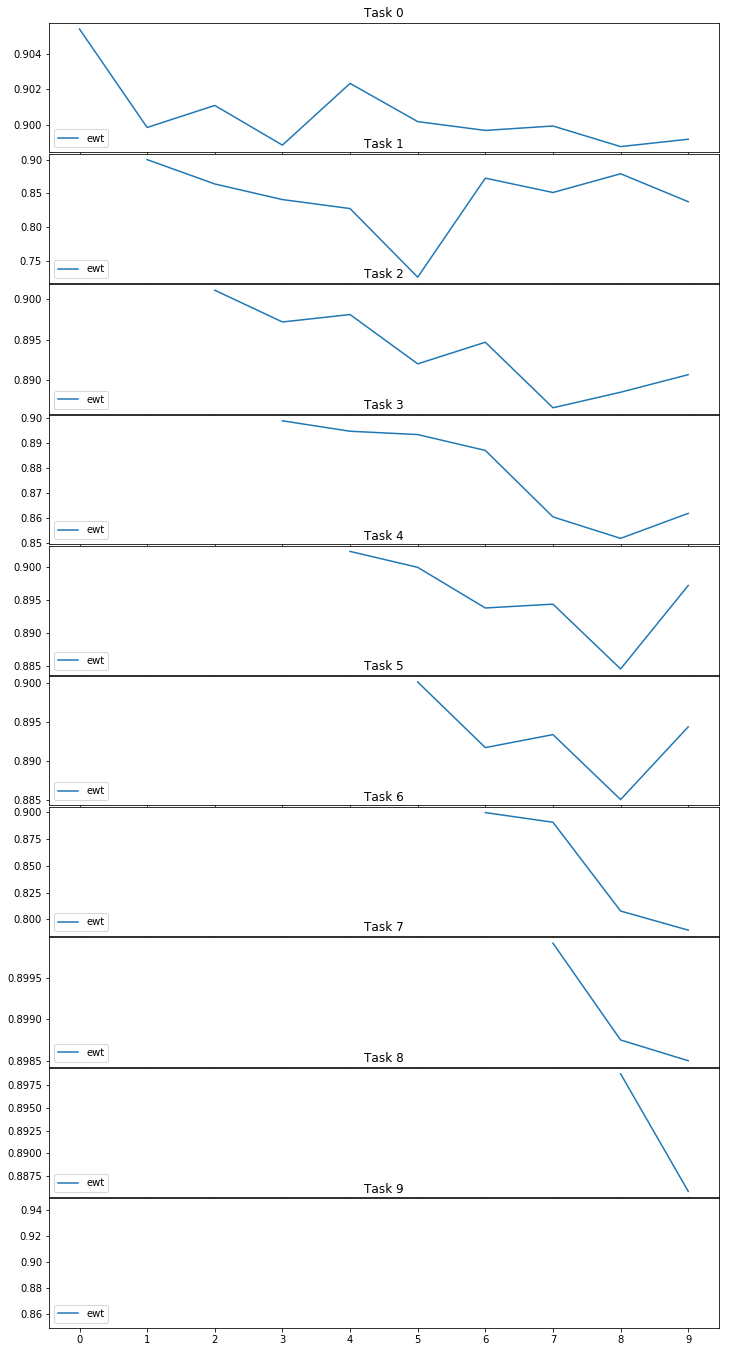

In [16]:
n_task = len(results_ewt['tasks'])
tot_epochs = 0

for k, v in results_ewt['tasks'].items():
    print(k, v['accuracy'])
    tot_epochs = max(tot_epochs, len(v['accuracy']))
    
fig = plt.figure(figsize=(12, 24))
ax = None
for i, task in enumerate(results_ewt['tasks'].keys()):

    ewt = results_ewt['tasks'][task]
    no_ewt = results_no_ewt['tasks'][task]

    x = range(tot_epochs-len(ewt['f1']), tot_epochs)
    ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 
    
    ax.plot(x, ewt['accuracy'], label='ewt')
    ax.plot(x, no_ewt['accuracy'], label='no ewt')
    
    ax.set_xticks(range(tot_epochs),minor=False)
    
    ax.set_title("Task {}".format(task))
    ax.legend(loc="lower left")
    
fig.subplots_adjust(hspace=0.01)

In [ ]:
n_task = len(results_no_ewt)
tot_epochs = max([len(i['metrics']) for _, i in results_no_ewt.items()])

fig = plt.figure(figsize=(12, 24))
ax = None

#ax = fig.add_subplot(1, 1, 1)

for i, task in enumerate(results_no_ewt.keys()):
    
    ewt = results_ewt[task]
    no_ewt = results_no_ewt[task]

    x = range(tot_epochs-len(ewt['metrics']), tot_epochs)
    
    m_ewt = defaultdict(list)
    m_no_ewt = defaultdict(list)
    
    for item in ewt['metrics']:
        for k, v in item.items():
            m_ewt[k].append(v)

    for item in no_ewt['metrics']:
        for k, v in item.items():
            m_no_ewt[k].append(v)
            
    ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 
    
    ax.plot(x, m_ewt['accuracy'], label='ewt')
    ax.plot(x, m_no_ewt['accuracy'], label='no ewt')
    ax.set_xticks(range(tot_epochs),minor=False)
    
    ax.set_title("Task {}".format(task))
    ax.legend(loc="lower left")
    
fig.subplots_adjust(hspace=0.01)